In [158]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

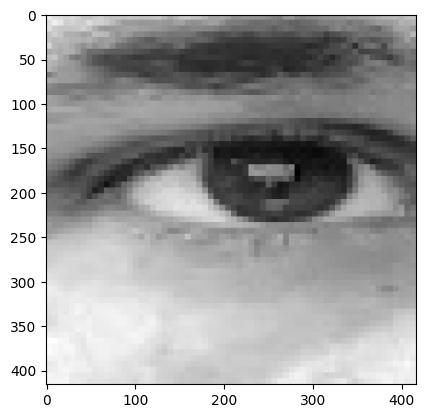

In [159]:
eye = cv2.imread('123.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(eye, cmap='gray')

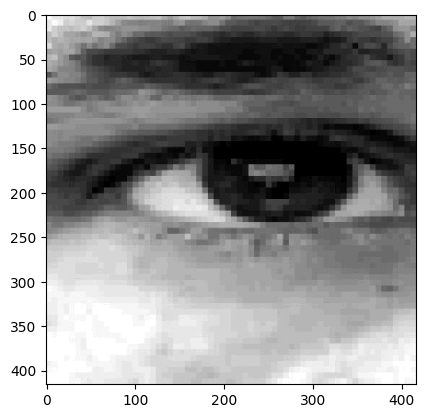

In [160]:
# Uniform quantization
image = cv2.equalizeHist(eye)

num_levels = 32
# image = eye
factor = num_levels / 256.0
bin_size = 256 // num_levels
quantized = (image.astype(np.float32) * factor).astype(np.int32) * bin_size

# Clip to valid uint8 range (defensive)
quantized = np.clip(quantized, 0, 255).astype(np.uint8)

plt.imshow(quantized, cmap='gray')

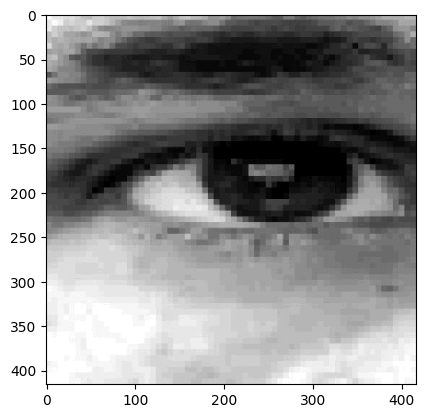

In [161]:
# im_q = cv2.equalizeHist(quantized)
# plt.imshow(im_q, cmap='gray')

im_q = quantized
plt.imshow(im_q, cmap='gray')



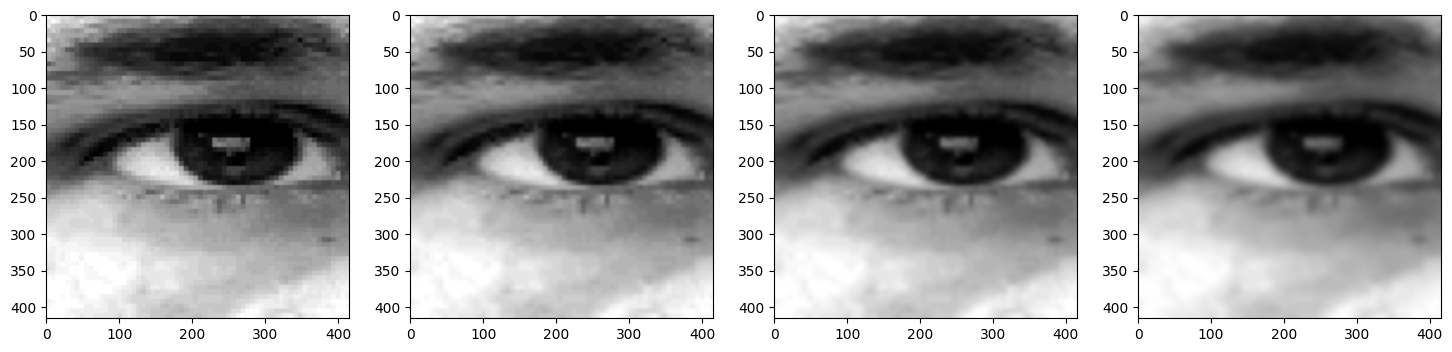

In [162]:
fig = plt.figure(figsize=(18, 12))

plt.subplot(141)
im_g = cv2.GaussianBlur(im_q, (3,3), 0)
plt.imshow(im_g, cmap='gray')

plt.subplot(142)
im_g = cv2.GaussianBlur(im_q, (9,9), 0)
plt.imshow(im_g, cmap='gray')

plt.subplot(143)
im_g = cv2.GaussianBlur(im_q, (15,15), 0)
plt.imshow(im_g, cmap='gray')

plt.subplot(144)
im_g = cv2.GaussianBlur(im_q, (25,25), 0)
plt.imshow(im_g, cmap='gray')

In [163]:
print(im_g)

[[240 240 240 ... 174 174 174]
 [240 240 240 ... 174 174 174]
 [240 239 239 ... 173 173 173]
 ...
 [248 248 248 ... 242 242 242]
 [248 248 248 ... 242 242 242]
 [248 248 248 ... 242 242 242]]


Mean: 124.76411681767752, Standard Deviation: 72.2802916614574


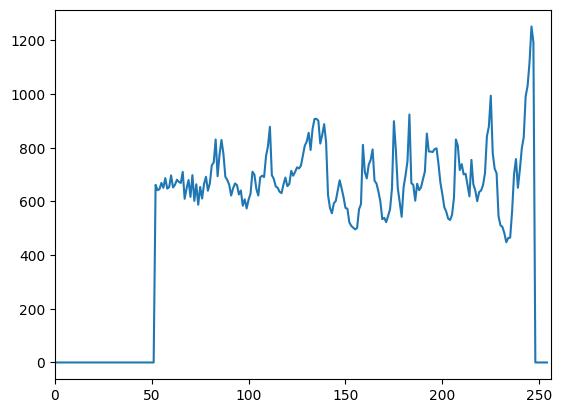

In [164]:
mean = im_g.mean()
stddev = im_g.std()
print(f'Mean: {mean}, Standard Deviation: {stddev}')

# Create mask: pixels < mean + 2*std
mask = im_g < (mean - 1 * stddev)

# Set those pixels to 0
im_g[mask] = 0

# Calculate image histogram values
hist = cv2.calcHist([im_g],[0],None,[255],[1,256]) # ([img],[chanels],mask,bin_count,range)

# Plot the histogram next to the image
# plt.subplot(121)
plt.plot(hist)
plt.xlim([0,256])
plt.show()

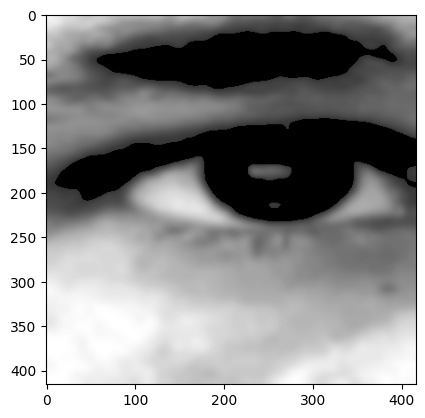

In [165]:
plt.imshow(im_g, cmap='gray')

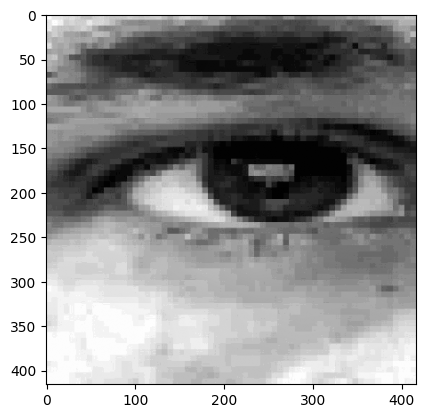

In [169]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
im_equalised2 = clahe.apply(im_q)
plt.imshow(im_equalised2, cmap='gray')

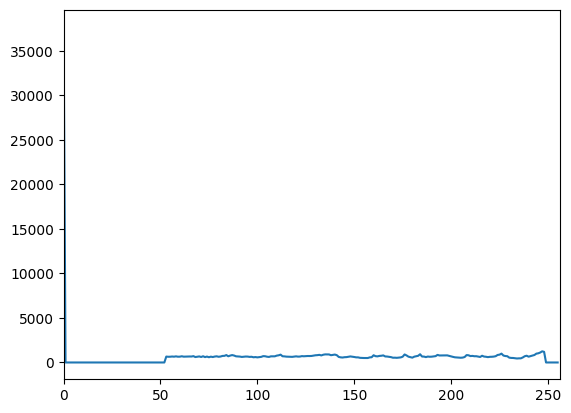

In [166]:
# Calculate image histogram values
hist = cv2.calcHist([im_g],[0],None,[256],[0,256]) # ([img],[chanels],mask,bin_count,range)

# Plot the histogram next to the image
# plt.subplot(121)
plt.plot(hist)
plt.xlim([0,256])
plt.show()


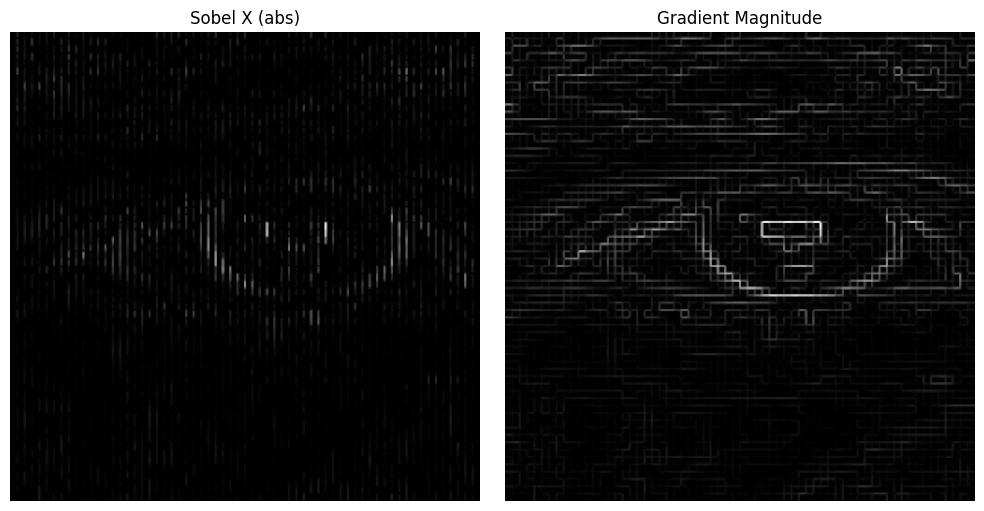

In [173]:
# Step 2: Compute Sobel gradients
sobelx = cv2.Sobel(eye, cv2.CV_64F, 1, 0, ksize=3)  # Gx
sobely = cv2.Sobel(eye, cv2.CV_64F, 0, 1, ksize=3)  # Gy

# Step 3: Compute gradient magnitude
magnitude = np.sqrt(sobelx**2 + sobely**2)
# magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Optional: Show results
plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.imshow(img, cmap='gray')
# plt.title('Original')
# plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.absolute(sobelx), cmap='gray')
plt.title('Sobel X (abs)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

In [174]:
# print(quantized[150:160, 200:220])
# plt.imshow(quantized[150:160, 200:220])

In [175]:
print(quantized[0:20, 0:20])

[[248 248 240 240 248 240 232 224 224 224 224 224 224 224 224 224 224 224
  216 216]
 [248 248 248 248 248 248 232 224 224 224 224 224 224 224 216 224 224 224
  224 216]
 [240 248 248 248 248 248 232 224 224 224 224 224 224 224 224 224 224 224
  224 216]
 [240 248 248 240 240 248 232 224 224 224 224 224 224 224 224 224 224 224
  224 216]
 [248 248 248 248 248 248 232 224 224 224 224 224 224 224 224 224 216 224
  224 216]
 [240 248 248 248 248 240 232 224 224 224 224 224 224 224 224 224 224 224
  224 216]
 [232 232 232 232 232 232 232 232 232 232 232 232 232 232 224 224 224 232
  224 216]
 [224 224 224 224 224 224 232 248 248 248 248 248 240 240 232 232 232 240
  232 216]
 [224 224 224 224 224 224 232 248 248 240 248 248 248 232 232 232 232 232
  232 216]
 [224 216 216 224 224 224 232 248 248 248 248 248 248 232 240 232 232 232
  232 216]
 [224 224 224 224 224 224 232 240 248 240 240 240 248 232 232 232 232 232
  232 216]
 [224 224 224 224 224 224 232 248 248 248 248 248 248 232 232 232